Visualization of Teeth Images and Bounding Boxes

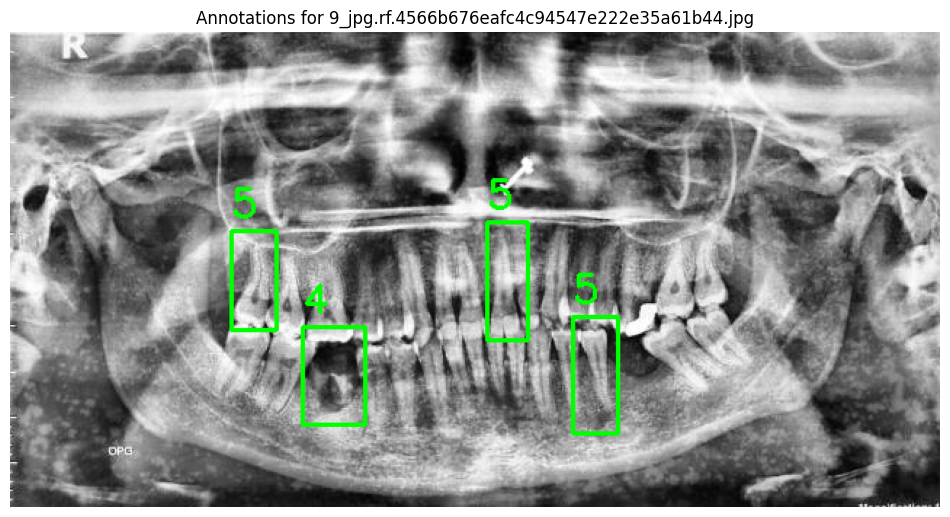

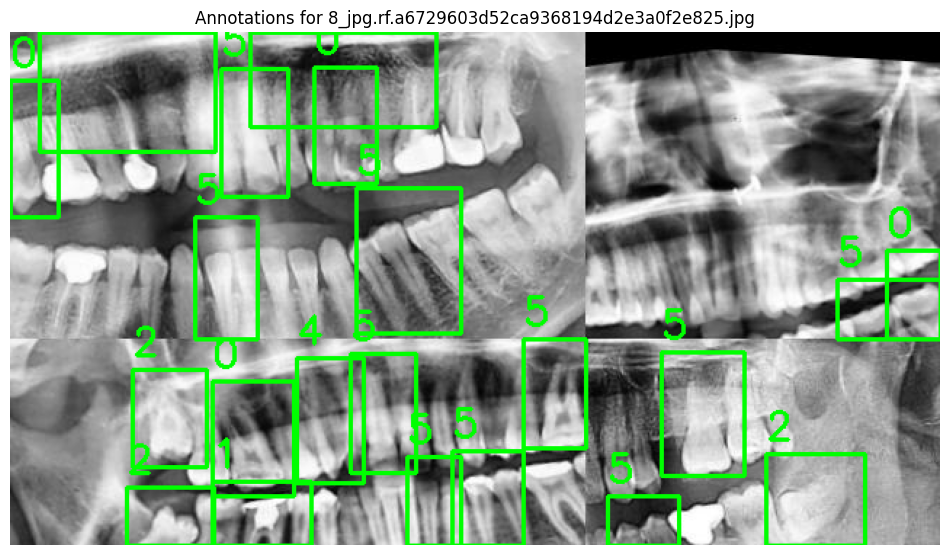

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

def visualize_bounding_boxes(image_path, label_path, class_names=None):
    """
    Reads an image and its YOLO-formatted label file, then draws the
    bounding boxes on the image and displays it.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the YOLO label file (.txt).
        class_names (list): A list of class names where the index corresponds
                              to the class ID.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return
        
    # Get image dimensions
    height, width, _ = image.shape

    try:
        with open(label_path, 'r') as f:
            for line in f:
                # Parse the line
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                
                class_id, x_center, y_center, box_width, box_height = map(float, parts)
                class_id = int(class_id)

                # De-normalize the coordinates
                abs_x_center = x_center * width
                abs_y_center = y_center * height
                abs_width = box_width * width
                abs_height = box_height * height

                # Calculate top-left corner coordinates
                x1 = int(abs_x_center - (abs_width / 2))
                y1 = int(abs_y_center - (abs_height / 2))
                x2 = int(x1 + abs_width)
                y2 = int(y1 + abs_height)

                # Draw the bounding box
                # You can customize the color (B, G, R) and thickness
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
                # Optionally, add the class label
                label = str(class_id)
                if class_names and class_id < len(class_names):
                    label = class_names[class_id]
                
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


    except FileNotFoundError:
        print(f"Error: Label file not found at {label_path}")
        return

    # Display the image using matplotlib
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Annotations for {image_path.split('/')[-1]}")
    plt.axis('off')
    plt.show()

# --- Example Usage ---
# Updated to use augmented training data
image_file = 'Dental OPG XRAY Dataset/Augmented_Data/train/images/9_jpg.rf.4566b676eafc4c94547e222e35a61b44.jpg'
label_file = 'Dental OPG XRAY Dataset/Augmented_Data/train/labels/9_jpg.rf.4566b676eafc4c94547e222e35a61b44.txt'

# You can define a list of your class names if you know them.
# If not, it will just show the class ID number.
# For example: class_labels = ['canine', 'molar', 'premolar', ...]
class_labels = None 

visualize_bounding_boxes(image_file, label_file, class_labels)

# You can also try it for another augmented file
image_file_2 = 'Dental OPG XRAY Dataset/Augmented_Data/train/images/8_jpg.rf.a6729603d52ca9368194d2e3a0f2e825.jpg'
label_file_2 = 'Dental OPG XRAY Dataset/Augmented_Data/train/labels/8_jpg.rf.a6729603d52ca9368194d2e3a0f2e825.txt'
visualize_bounding_boxes(image_file_2, label_file_2, class_labels)
